In [2]:
### uncomment to display figures
%matplotlib inline

# Demonstrates benchmarking functionality - OzFlux ET sites

#### Benchmarking dataset information
The actual ET (in mm) dataset consists of actual evapotranspiration estimates from the OzFlux flux tower network observations infilled accoring to the DINGO processing
<br>
##### Source:
Beringer, J., Hutley, L. B., McHugh, I., Arndt, S. K., Campbell, D., Cleugh, H. A., Cleverly, J., Resco de Dios, V., Eamus, D., Evans, B., Ewenz, C., Grace, P., Griebel, A., Haverd, V., Hinko-Najera, N., Huete, A., Isaac, P., Kanniah, K., Leuning, R., Liddell, M. J., Macfarlane, C., Meyer, W., Moore, C., Pendall, E., Phillips, A., Phillips, R. L., Prober, S. M., Restrepo-Coupe, N., Rutledge, S., Schroder, I., Silberstein, R., Southall, P., Yee, M. S., Tapper, N. J., van Gorsel, E., Vote, C., Walker, J., and Wardlaw, T, 2016. An introduction to the Australian and New Zealand flux tower network – OzFlux, Biogeosciences, 13, 5895-5916.<br>
Beringer, J., McHugh, I., Hutley, L.B., Isaac, P. and Kljun, N., 2016. Dynamic INtegrated Gap-filling and partitioning for OzFlux (DINGO). Biogeosciences Discuss., 2016: 1-36.
	

This notebook goes through the following steps:

1. Import required libraries
2. Set up benchmarking configuration <br>
 2.1 Define observation inputs<br>

3. Create benchmark object<br>
4. Add models to be benchmarked <br>
 4.1 Select or unselect models<br> 
5. View benchmarking statistics<br>
6. View benchmarking plots<br>
 6.1 Time series<br>
 6.2 Regression Plots<br>
7. Statistics plotting<br>

### 1. Import required libraries

In [1]:
from awrams.benchmarking.benchmark import Benchmark
from awrams.benchmarking.utils import read_id_csv
from awrams.utils import datetools as dt

from awrams.utils import config_manager
    
sys_profile = config_manager.get_system_profile().get_settings()
TRAINING_DATA_PATH = sys_profile['DATA_PATHS']['TRAINING_DATA']

### 2.  Set up benchmarking configuration
Comparison at OzFlux ET sites <br>
You can use your own data in csv form similar to the example provided. <br>
It just needs to have column names matching the names used in extracting AWRA data

#### 2.1. Observations to use

In [3]:
data_path = TRAINING_DATA_PATH + '/benchmarking/ozflux/'

#obs_csv = data_path +'/ozflux_monthly.csv'
obs_csv = data_path + '/Dingo_daily.csv'

### 3.  Create the benchmark object:<br> 

An object of "Benchmark" class is created by defining what variable is to be benchmarked. 
Everything else gets progressively added,  and statistics are calculated when the observation and model outputs are added.

In [4]:
et = Benchmark("OzFlux", "evapotranspiration")
et.site_set_name = ['ET flux tower benchmarking','OzFlux']
et.id_type = 'site'
et.site_id_type = 'Unique_ID'
et.site_ref_type = 'ID'

# Add observations and catchment subset [the id list needs to be present in the column names of the observation file]
et.load(obs_csv)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:39: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.monthly = self.obs.data.resample(rule='m', how=self.aggr_how)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/comparison.py:40: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  self.obs.annual = self.obs.data.resample(rule='A', how=self.aggr_how)


In [5]:
et.sites

['Adelaide River',
 'Alice Springs',
 'Calperum',
 'Cumberland Plains',
 'Daintree',
 'Daly River Pasture',
 'Daly River Uncleared',
 'Dry River',
 'Fogg Dam',
 'Great Western Woodlands',
 'Gingin',
 'Howard Springs',
 'Nimmo',
 'Red Dirt Melon Farm',
 'Riggs Creek',
 'Sturt Plains',
 'Ti Tree East',
 'Tumbarumba',
 'Wallaby Creek',
 'Warra',
 'Whroo',
 'Wombat',
 'Yanco Jaxa']

### 4. Add models to be benchmarked
Read data from pre-processed csv. These pre-processed csvs were in this case obtained by using the extraction routine for the relevant variable for the points to be benchmarked

This step processes the data and calculates all the statistics [can take a while]

In [6]:
# Reading data from pre-processed csv

csv_data = data_path+'/AWRAMSI_v5QES_AWRAL_etot_avg_OzFlux_DINGO.csv'
et.add_model("AWRAMSI_v5_0_AWRAL", data_csv=csv_data)

/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:151: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  _df = cur_data[valid_idx].resample(rule='m', how=np.mean).dropna()
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:152: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  monthly_data = pd.DataFrame(_df,index=_df.index|valid_idx).fillna(method='bfill').resample(rule='m', how=np.sum)[col_name]
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/utils.py:181: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  out_dct[col] = ts.resample(annual_rule, how)
/home/biancag/Documents/awrams_cm/packages/awrams/benchmarking/stats.py:305: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1-r*r)*ssym / ssxm / df)
/home/biancag/Documents/awrams_cm/packages/awrams/benchm

In [7]:
csv_data = data_path+'/awral_etot_avg.csv'
et.add_model("AWRAMSI_v4_0_AWRAL", data_csv=csv_data)

In [8]:
## Sample code here to extract data at OzFlux sites
# import pandas as pd
# from awrams.utils import extents
# from awrams.utils.io.data_mapping import SplitFileManager
# from awrams.utils.processing.extract import extract_from_filemanager


# site_loc_csv = '../../benchmarking/awrams/benchmarking/data/SiteLocationsWithUniqueID.csv'
# site_loc_data = pd.read_csv(site_loc_csv)
# var_names = ['etot_avg']
# data_path = '/path/to/outputs/'
# period = dt.dates('jul 2010 - jun 2011')
# mod_site_list = ['OzFlux_' + site for site in et.sites] # or a subset thereof

# for var_name in var_names:
#     pattern = data_path + '/%s*' % var_name
#     sfm = SplitFileManager.open_existing(data_path,pattern,var_name)
#     georef = sfm.get_extent()
#     extent_map = {}
    
#     for site in mod_site_list:
#         coords= site_loc_data[site_loc_data['Unique_ID']==site][['lats','lons']].values[0]
#         extent_map[site] = georef.factory.get_by_cell_coords(coords[0],coords[1])

#     df = extract_from_filemanager(sfm,
#                  extent_map,
#                  period)
#     df

#     df.to_csv('./for_oznet/'+ var_name+ '.csv' )

#### 4.1 Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [9]:
et.benchmark.selection

['AWRAMSI_v5_0_AWRAL', 'AWRAMSI_v4_0_AWRAL']

In [30]:
#et.benchmark.selection.AWRAMSI_v5_0_AWRAL.unselect()
et.benchmark.selection.AWRAMSI_v5_0_AWRAL.select()

### 5. View Benchmarking Statistics
Summary percentiles can be printed out by specifying a statistic from: <br> 
"grand_f", "nse", "bias_relative", "pearsons_r" (default), "mean"  <br>
to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

These tables are pandas dataframes, so they can be exported to csv

In [31]:
et.benchmark.stat_percentiles(freq='m')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,0.705912,0.707152,0.712113,0.718315,0.821918,0.90480,0.925520
AWRAMSI_v5_0_AWRAL,0.266411,0.489914,0.681631,0.822516,0.866818,0.93328,0.943577


In [32]:
et.benchmark.stat(statistic='bias_relative', freq='m')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,-0.115299,0.036005
Tumbarumba,-0.052485,-0.007385
Wallaby Creek,-0.073684,-0.099986
all,-0.085683,0.068588


In [33]:
et.benchmark.stat(statistic='bias')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,-11.302368,3.529516
Tumbarumba,-3.802094,-0.537564
Wallaby Creek,-5.195055,-7.049469
all,-7.016001,4.491181


In [34]:
et.benchmark.stat(statistic='nse', freq='m')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,0.085005,0.180381
Tumbarumba,0.799203,0.840492
Wallaby Creek,0.476190,0.454109
all,0.527920,0.594098


In [35]:
et.benchmark.stat(statistic='pearsons_r', freq='m')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,0.718315,0.721515
Tumbarumba,0.925520,0.933990
Wallaby Creek,0.705912,0.699618
all,0.773188,0.824587


In [36]:
et.benchmark.stat(statistic='rmse', freq='m')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,28.268805,27.037968
Tumbarumba,13.749657,12.383569
Wallaby Creek,34.615527,35.337625
all,25.578780,24.776229


In [37]:
et.benchmark.stat(freq='y') # mean

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL,OzFlux
Howard Springs,1009.714351,1218.695315,1176.341129
Tumbarumba,799.163370,867.093048,873.543813
Wallaby Creek,783.715709,761.462743,846.056370
all,877.611494,822.625734,770.874946


In [38]:
et.benchmark.stat(statistic='bias_relative', freq='y')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,-0.115299,0.036005
Tumbarumba,-0.052485,-0.007385
Wallaby Creek,-0.073684,-0.099986
all,-0.085683,0.067133


In [39]:
et.benchmark.stat(statistic='bias', freq='y')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,-131.591853,42.354186
Tumbarumba,-44.267242,-6.450765
Wallaby Creek,-62.340660,-84.593627
all,-82.243128,51.750788


In [40]:
et.benchmark.stat(statistic='nse', freq='y')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,-1.690791,-0.576129
Tumbarumba,0.247863,0.223652
Wallaby Creek,0.018337,-0.018708
all,0.219627,0.744748


In [41]:
et.benchmark.stat(statistic='pearsons_r', freq='y')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,0.663788,0.267799
Tumbarumba,0.708580,0.489851
Wallaby Creek,0.345003,0.307918
all,0.627351,0.878142


In [42]:
et.benchmark.obs.annual['Wallaby Creek']

2000-12-31            NaN
2001-12-31            NaN
2002-12-31            NaN
2003-12-31            NaN
2004-12-31       4.444376
2005-12-31    1377.081907
2006-12-31     809.459382
2007-12-31     818.929231
2008-12-31     762.786936
2009-12-31     400.077413
2010-12-31     593.463410
2011-12-31     796.637752
2012-12-31    1192.899539
2013-12-31            NaN
2014-12-31            NaN
2015-12-31            NaN
Freq: A-DEC, Name: Wallaby Creek, dtype: float64

In [43]:
et.benchmark.models.AWRAMSI_v5_0_AWRAL.data.annual['Wallaby Creek']

2005-12-31    785.781696
2006-12-31    696.550432
2007-12-31    730.331810
2008-12-31    737.865499
2009-12-31    735.266110
2010-12-31    798.573239
2011-12-31    816.617927
2012-12-31    790.715234
Freq: A-DEC, Name: Wallaby Creek, dtype: float64

In [44]:
et.benchmark.stat(statistic='rmse', freq='y')

,AWRAMSI_v4_0_AWRAL,AWRAMSI_v5_0_AWRAL
Howard Springs,213.878886,108.240384
Tumbarumba,94.090577,66.871910
Wallaby Creek,290.684178,296.118198
all,200.023563,161.078681


### 6. View benchmarking plots: 
### 6.1 Time Series

specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments

2019-03-05 17:15:34,207 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Adelaide River
2019-03-05 17:15:34,359 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Alice Springs
2019-03-05 17:15:34,579 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Calperum
2019-03-05 17:15:34,689 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Cumberland Plains
2019-03-05 17:15:34,795 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Daintree
2019-03-05 17:15:34,903 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Daly River Pasture
2019-03-05 17:15:35,008 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Daly River Uncleared
2019-03-05 17:15:35,128 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Dry River
2019-03-05 17:15:35,289 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Fogg Dam
2019-03-05 17:15:35,392 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Great Western Woodlands
2019-03-05 17:15:35,493 WARNING no data to plot for AWRAMSI_v4_0_AWRAL site Gingin
2019-03-0

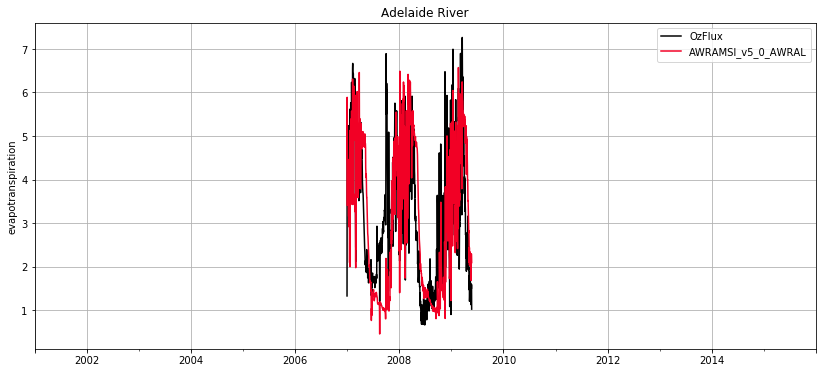

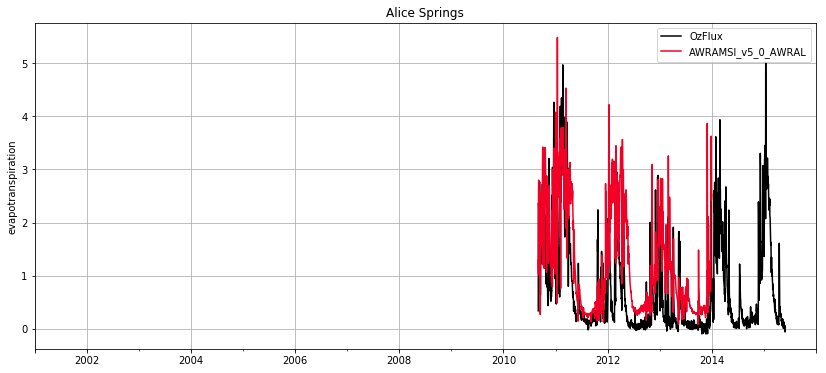

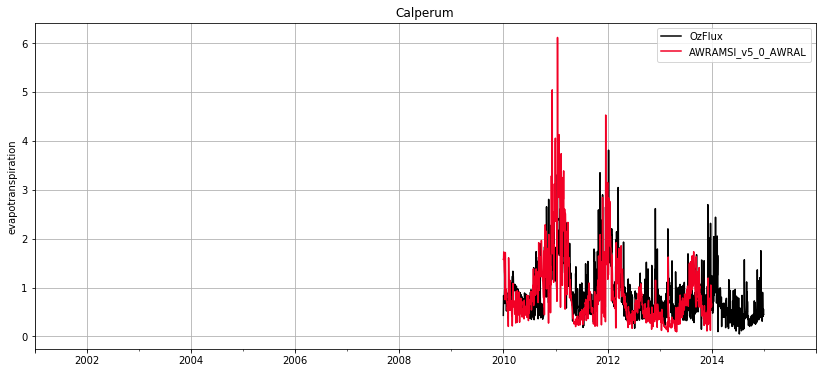

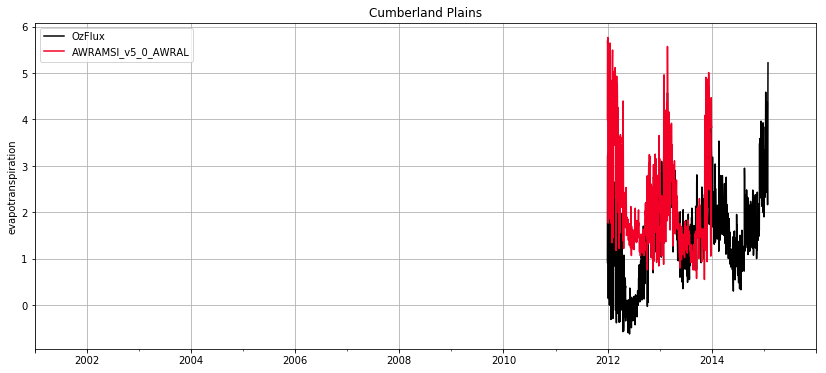

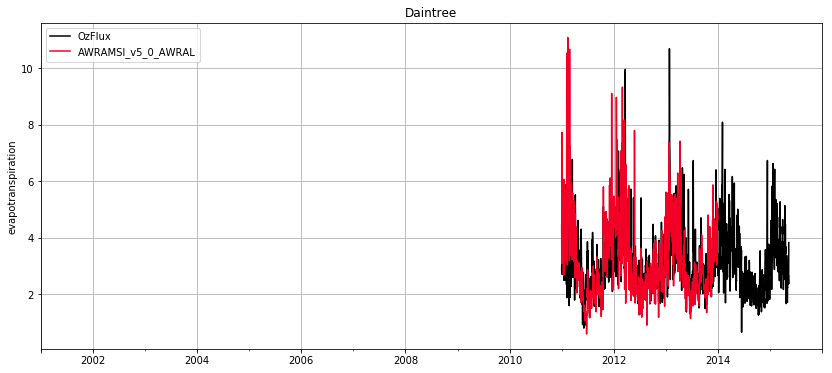

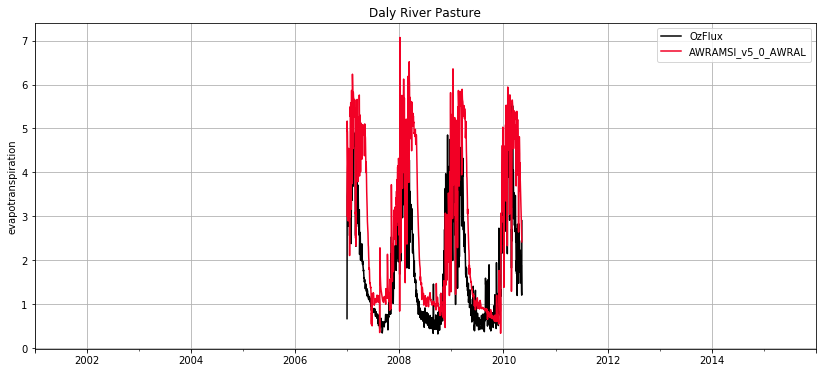

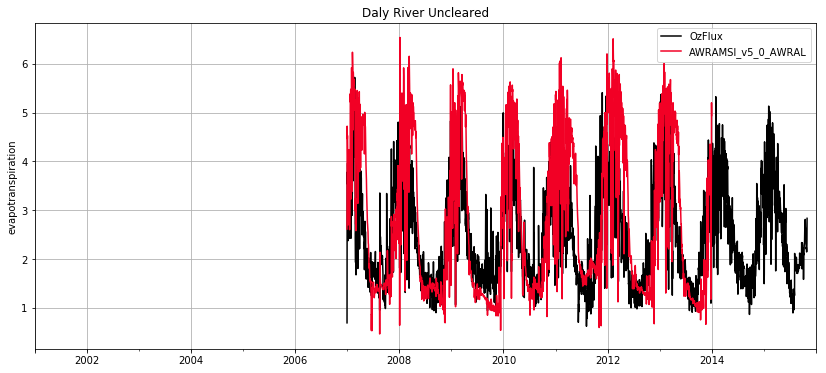

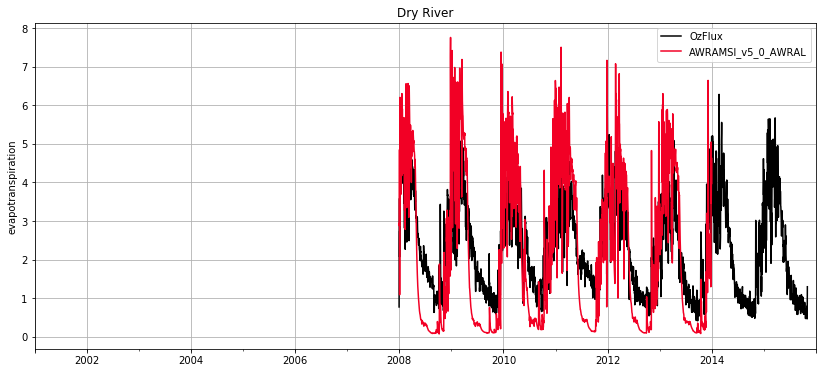

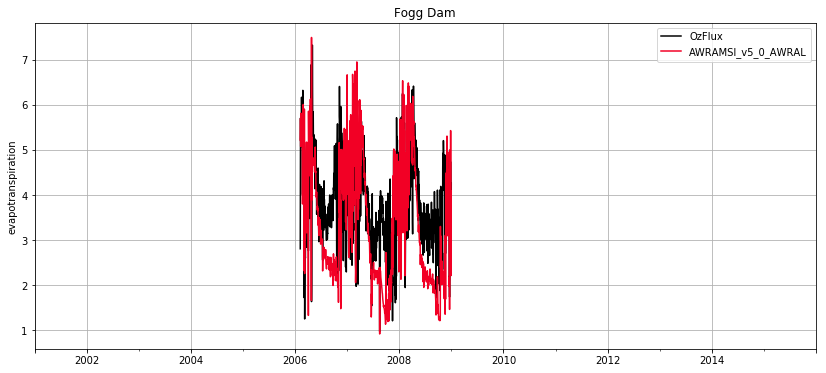

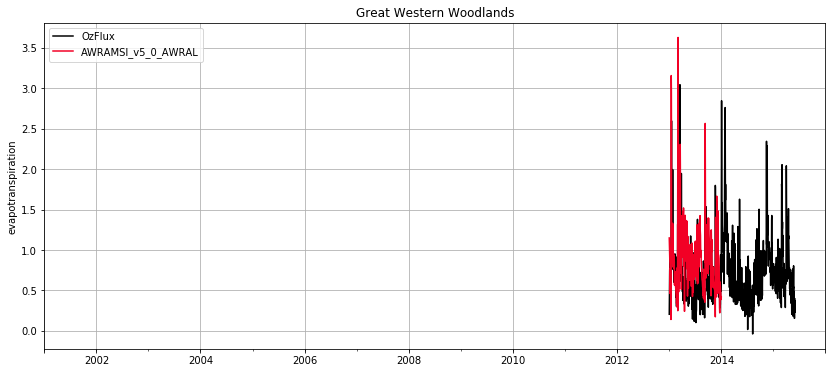

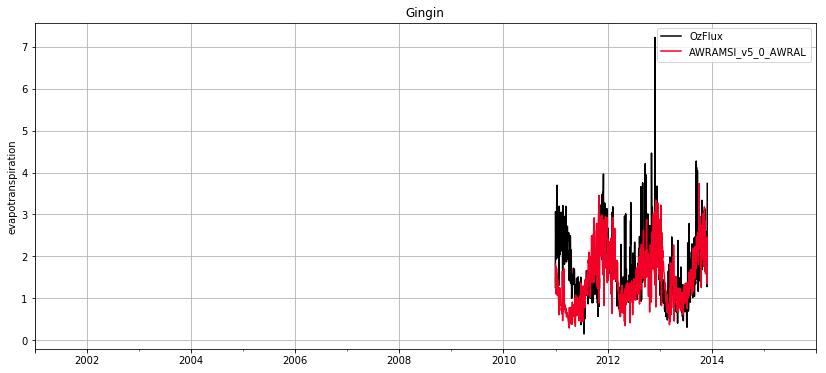

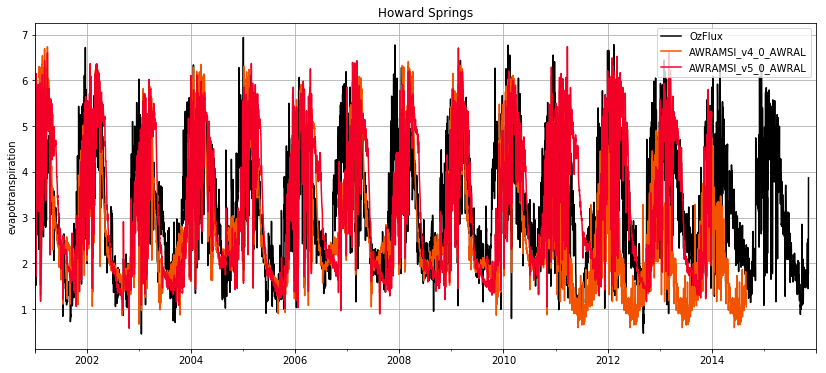

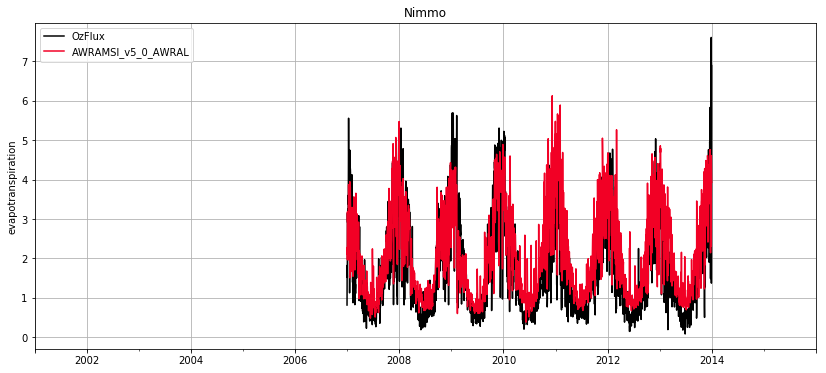

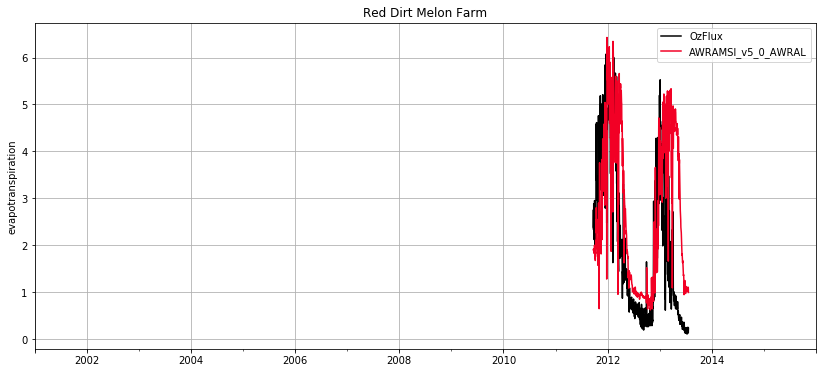

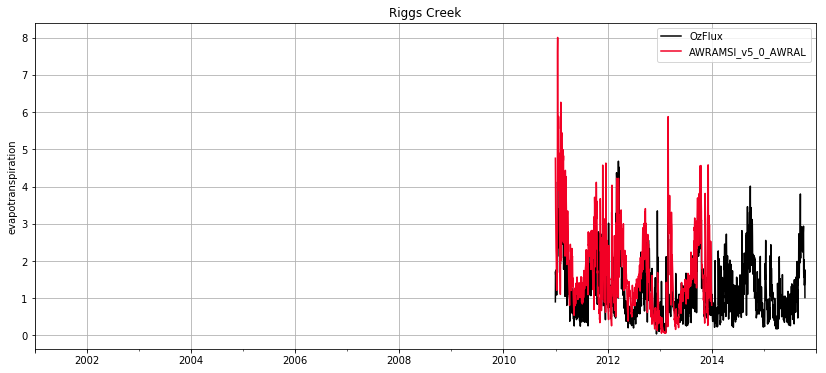

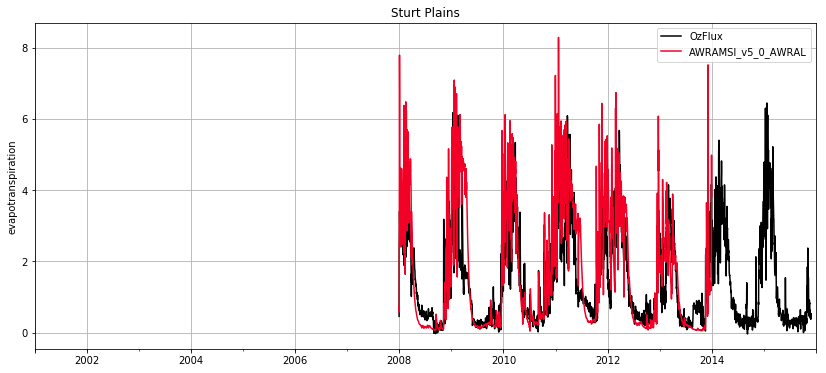

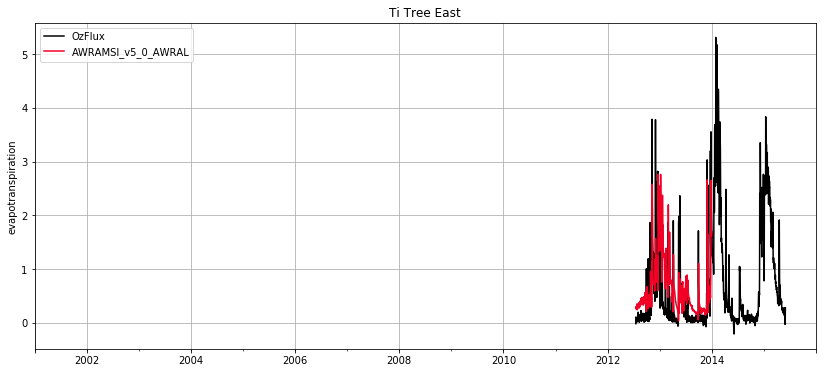

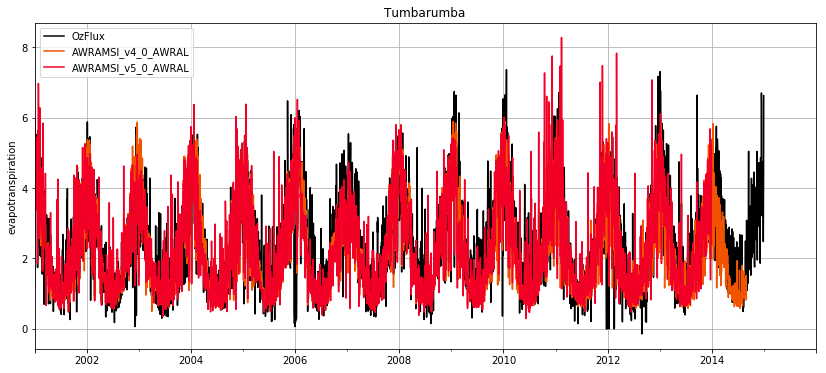

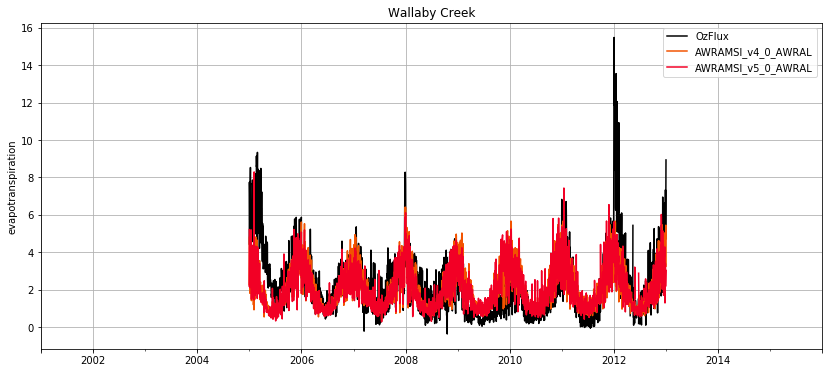

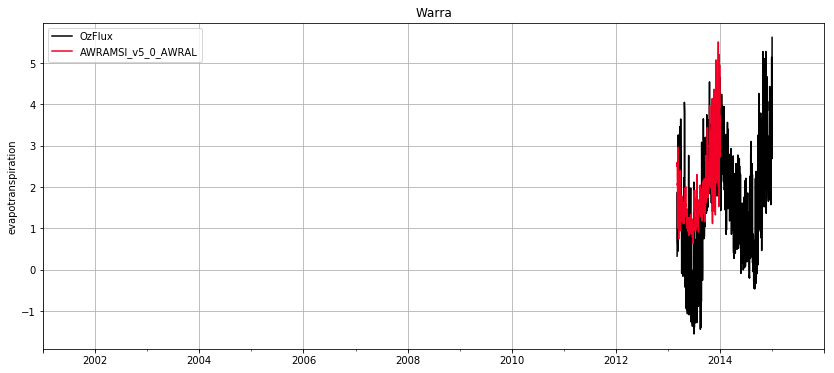

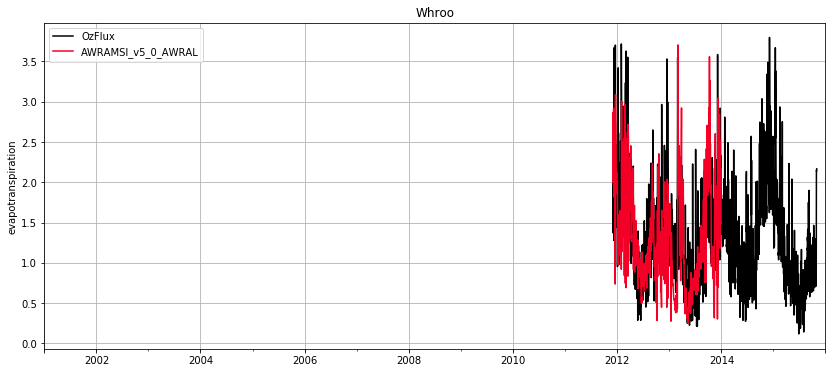

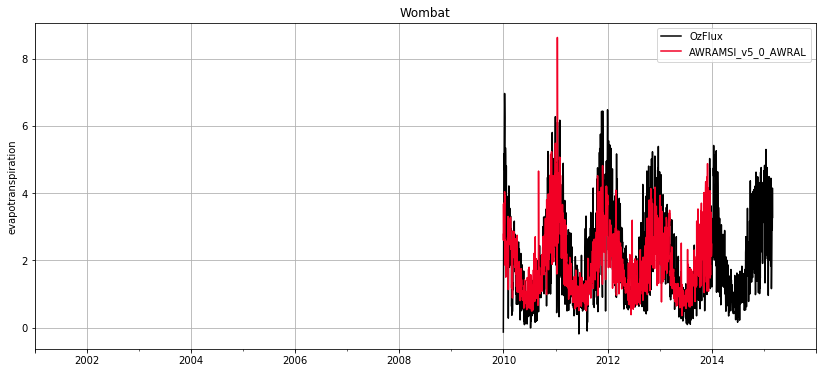

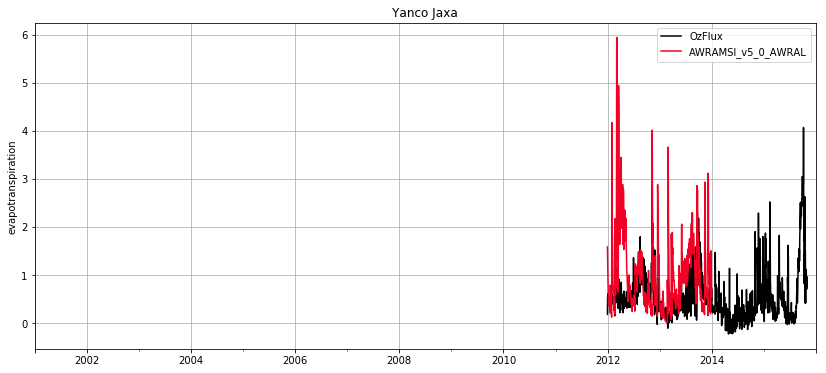

In [45]:
for site in et.sites:
    p = et.benchmark.plot_timeseries(site, freq='d') #u'Tumbarumba')

In [46]:
et

### 6.2 Regression Plots

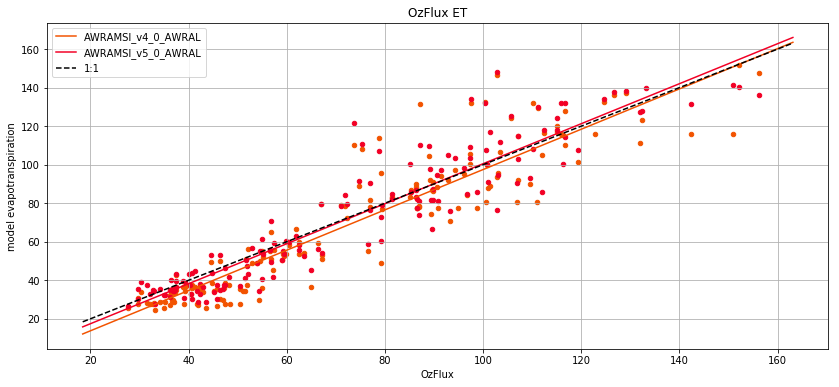

In [47]:
p = et.benchmark.plot_regression(title="OzFlux ET", site='Tumbarumba')

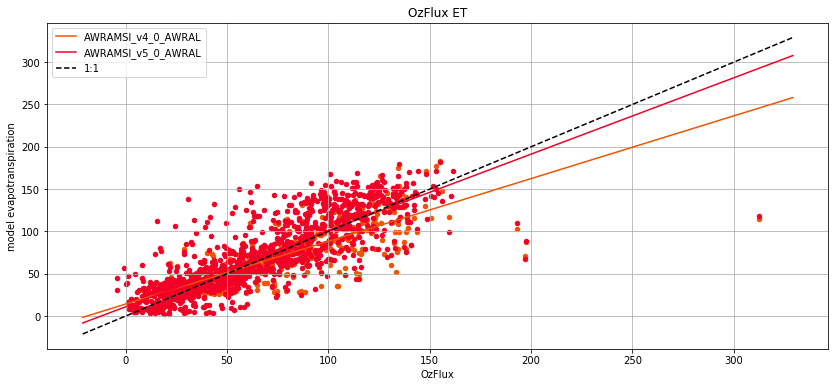

In [48]:
p = et.benchmark.plot_regression(title="OzFlux ET")

### 7. Statistics plotting
specify statistic type from "fobj", "nse", "rmse", "bias_relative", "pearsons_r" (default), "mean" and <br> frequency from 'd', 'm', 'y'

/home/biancag/miniconda3/envs/awra-cms/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


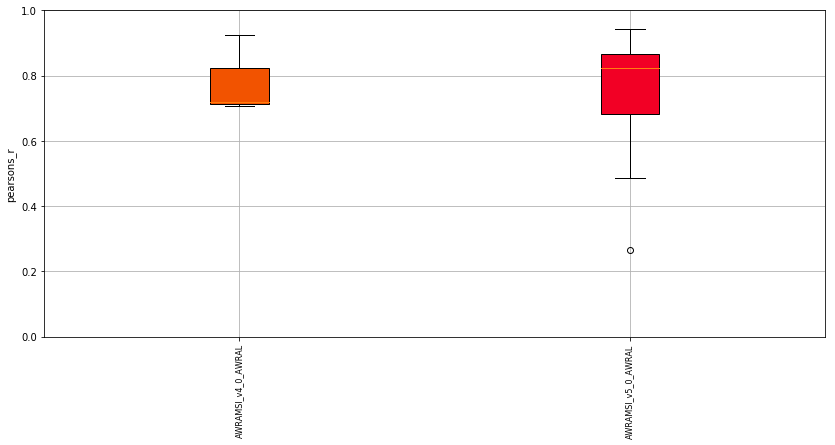

In [49]:
p = et.benchmark.plot_box('pearsons_r', freq='m', ylim=[0,1])